In [1]:
from sklearn import svm, datasets
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/anaconda3/envs/fastcampus/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/fastcampus/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/fastcampus/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/fastcampus/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def make_meshgrid(x, y, h=.005):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - .1, x.max() + .1
    y_min, y_max = y.min() - .1, y.max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [3]:
np.random.seed(2018402)
xy = np.random.rand(30,2)
labels = np.zeros((len(xy)))
labels[-4./5. +  3./4. * xy[:,0] + 1.0 * xy[:,1] > 0] = 1

## Support Vector Machine Formulation

Notice that $\zeta_i$ is slack variable.

$$
\min_{w,b,\zeta} \frac{1}{2}||w|| + C\sum_{i-1}^n \zeta_i
$$
subject to
\begin{align}
y_i(w\cdot \phi(x_i) + b) &\geq 1 - \zeta_i\\
\zeta_i &\geq 0
\end{align} for $i=1,2,\cdots, n$.

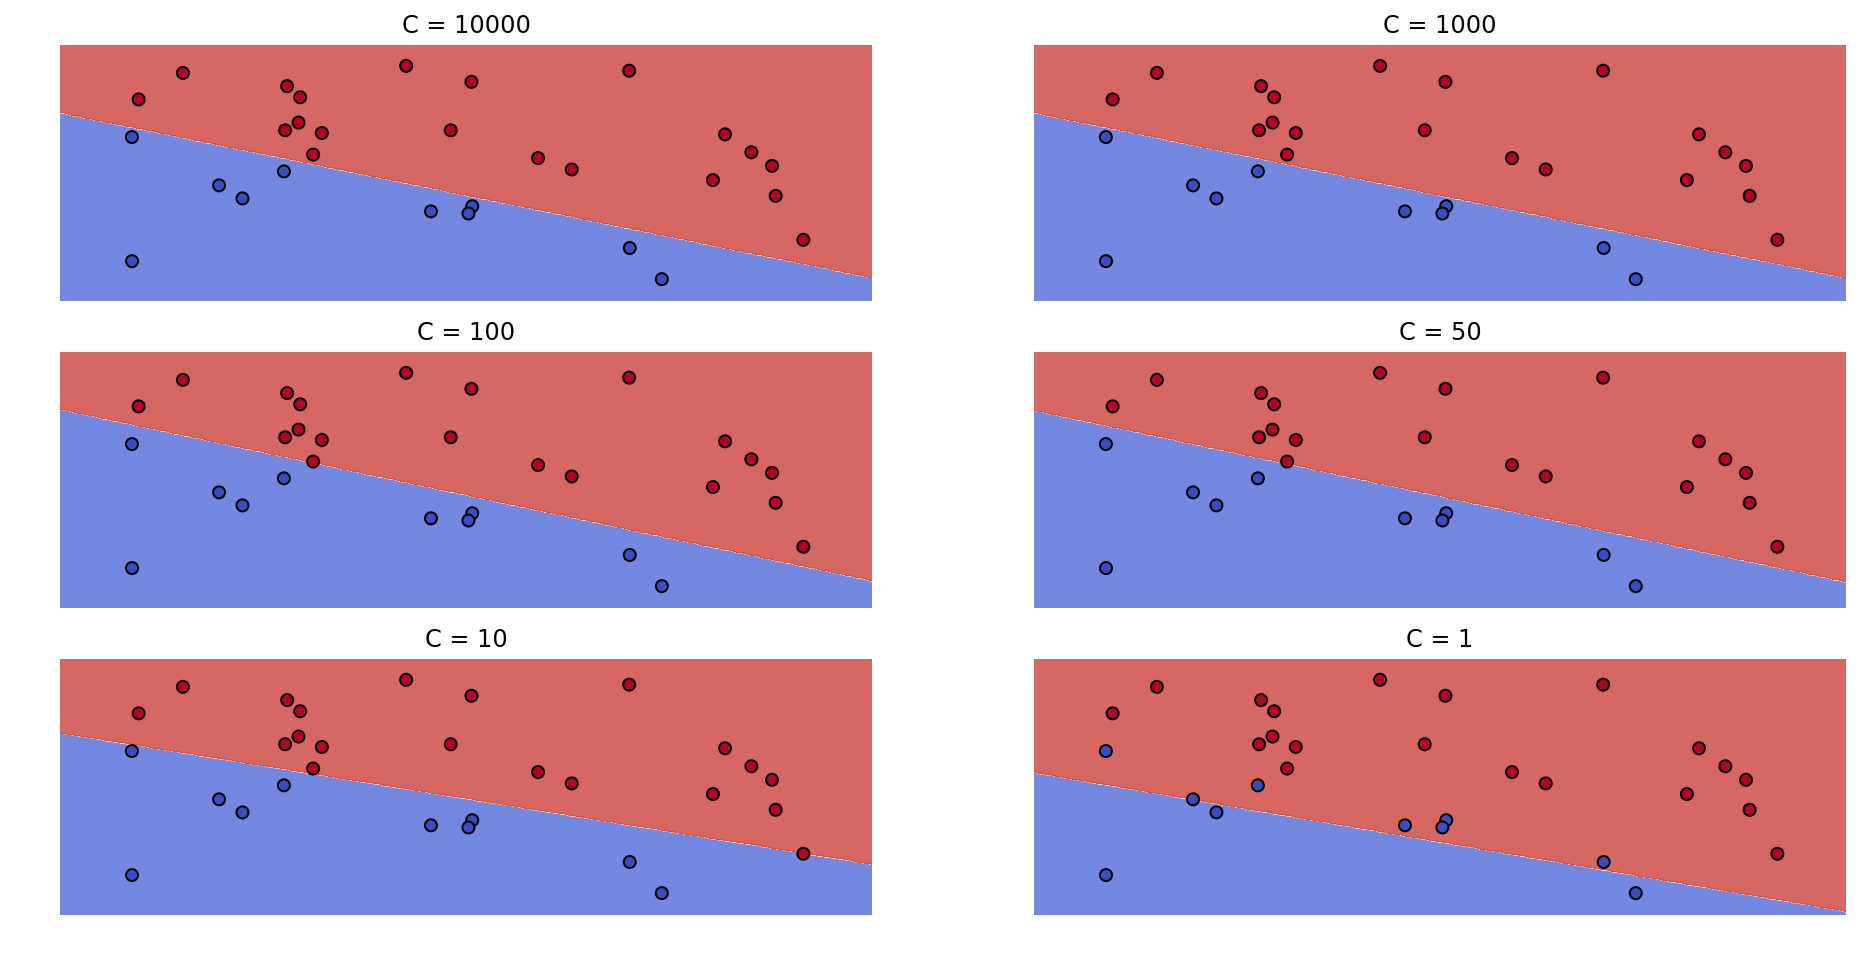

In [4]:
plt.figure(figsize=(16, 8))
for k, C in enumerate([10000, 1000, 100, 50, 10, 1],1):
    plt.subplot(3,2,k)
    model = svm.SVC(kernel='linear', C=C)
    model.fit(xy, labels)
    X0, X1 = xy[:,0], xy[:,1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(model, xx, yy,cmap='coolwarm', alpha=0.8)
    plt.scatter(X0, X1, c = labels, cmap='coolwarm', edgecolors='k')
    plt.title('C = {0}'.format(C))
    plt.axis('off')
plt.show()